# **Q1**

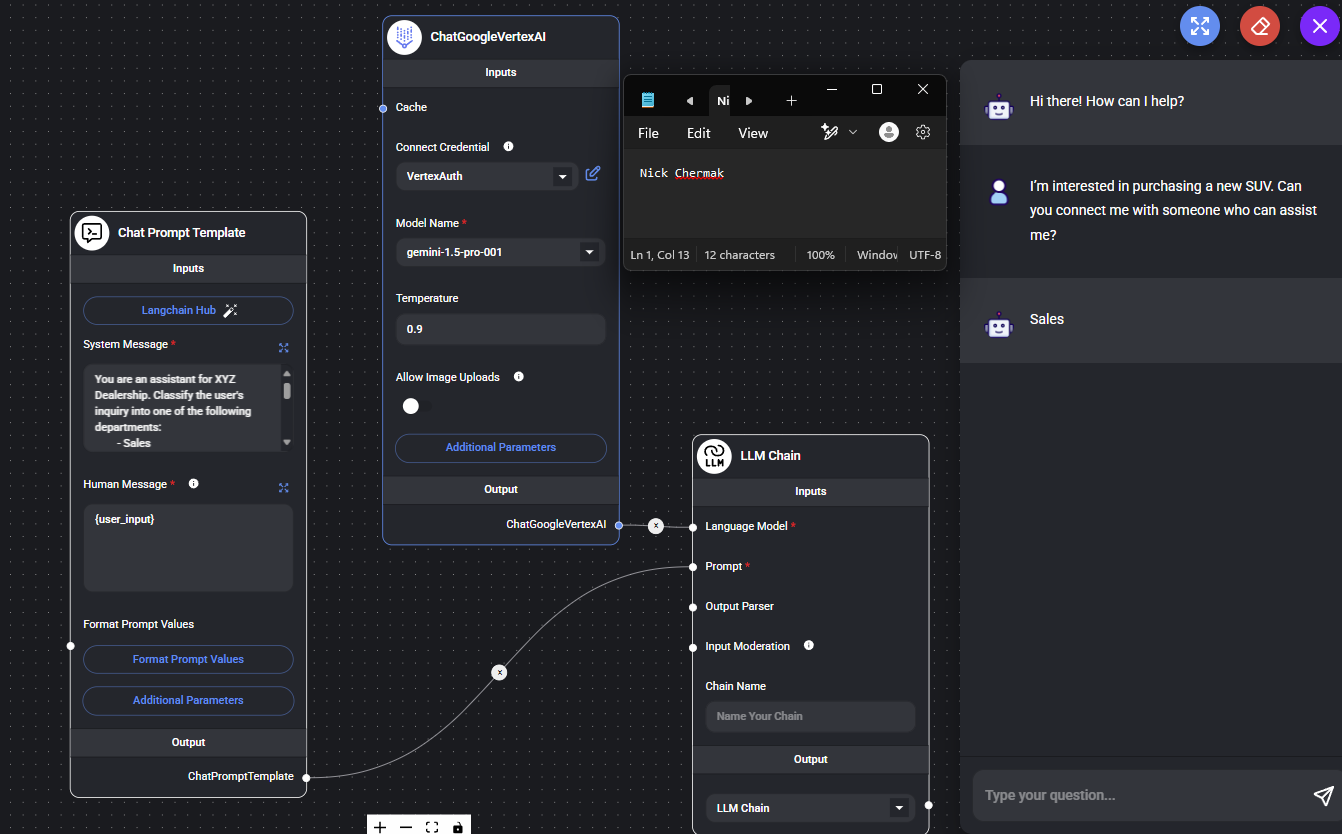

Code:

In [ ]:
import streamlit as st
import os
import vertexai
from langchain_google_vertexai import VertexAI
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain

# need to do this 
# pip install -r requirements.txt  - poetry
# then use: streamlit run main.py
# acutally use python -m streamlit run main.py (streamlit run main.py doesnt work)


os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="./nih-cl-cm500-nchermak-2ba6-c06ffadeffcb.json" # place the key JSON file in the same folder as your notebook

PROJECT_ID = "nih-cl-cm500-nchermak-2ba6" # use your project id, can get from key.json
REGION = "us-central1"  #


vertexai.init(project=PROJECT_ID, location=REGION)

llm = VertexAI(
    model_name="gemini-1.5-pro-001",
    max_output_tokens=256,
    temperature=0.1,
    top_p=0.8,
    top_k=40,
    verbose=True,
)

st.title("XYZ Dealership")
st.write("Enter your inquiry below, and I'll direct you to the correct department!")

user_query = st.text_input("What can I help you with?")

if user_query:
    prompt_template_name = PromptTemplate(
        input_variables=['user_input'],
        template="""
        You are an assistant for XYZ Dealership. Classify the user's inquiry into one of the following departments:
        - Sales
        - Car Service - Emergency
        - Car Service - Regular Maintenance
        - Human Resources
        - Other

        The user inquiry: "{user_input}"

        Respond **only** with the department name. Do not provide any additional text or explanation.
        """

    )
    chain = LLMChain(llm=llm, prompt=prompt_template_name)
    result = chain.invoke({"user_input": user_query})
    st.write(f"You should contact: {result['text']}")

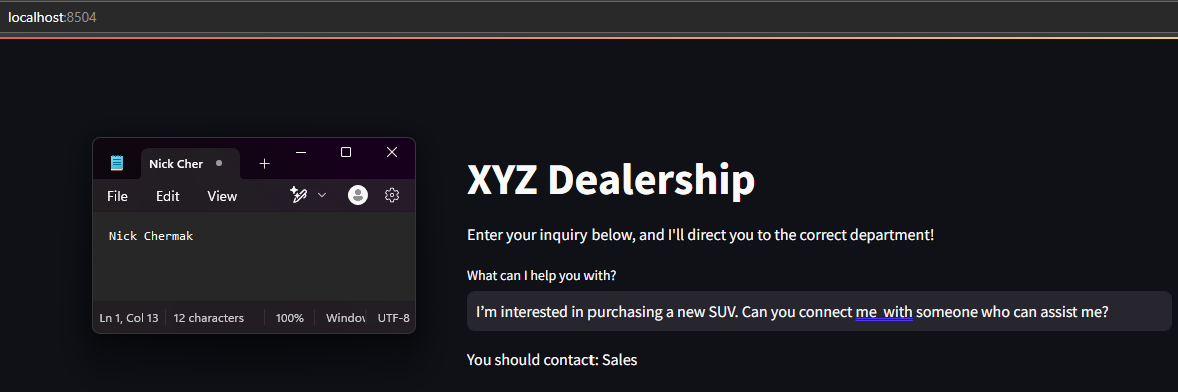

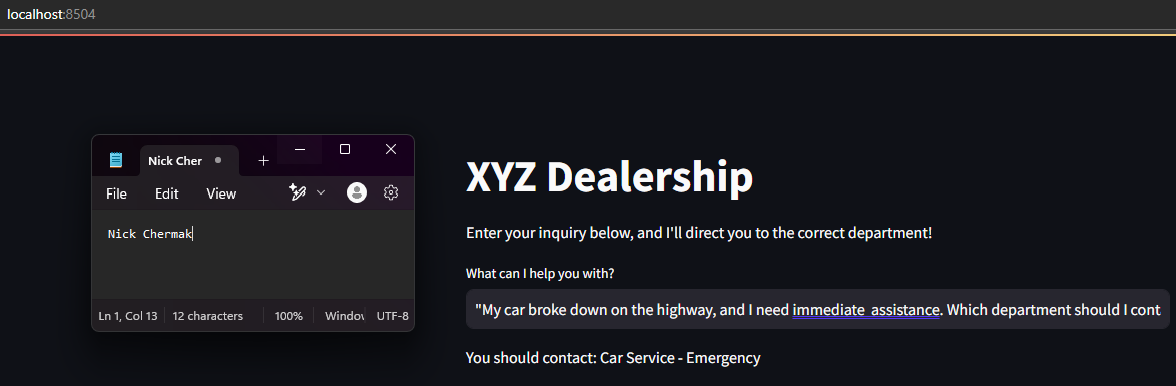

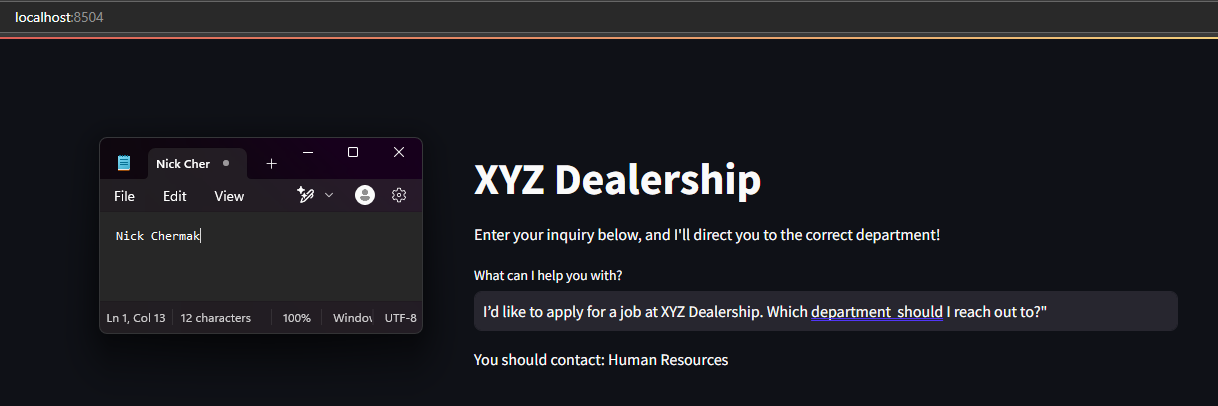

# **Q2**


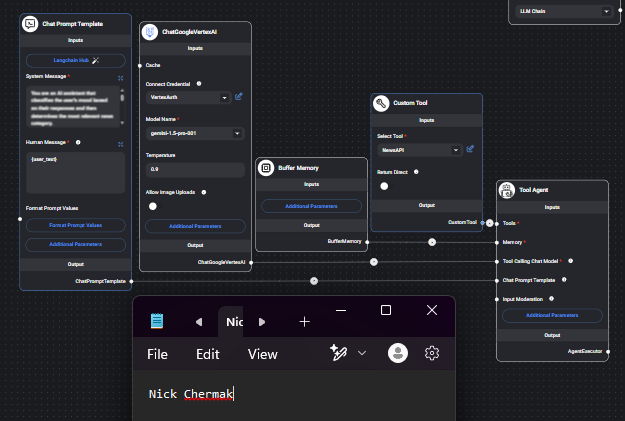

With Tool Agent:

In [ ]:
from langchain.agents import initialize_agent, AgentType
from langchain.tools import Tool
import streamlit as st
import os
import vertexai
from langchain_google_vertexai import VertexAI
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain
import requests
from langchain.memory import ConversationBufferMemory

# Install dependencies
# pip install -r requirements.txt - poetry
# Run using: python -m streamlit run main.py

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="./nih-cl-cm500-nchermak-2ba6-c06ffadeffcb.json"  # Replace with your key JSON file
PROJECT_ID = "nih-cl-cm500-nchermak-2ba6"  # Use your Google Cloud project ID
REGION = "us-central1"

vertexai.init(project=PROJECT_ID, location=REGION)

llm = VertexAI(
    model_name="gemini-1.5-pro-001",
    max_output_tokens=256,
    temperature=0.1,
    top_p=0.8,
    top_k=40,
    verbose=True,
)

st.title("Emotion Detector")
st.write("Answer a few questions, and I'll recommend relevant news based on your mood.")

questions = [
    "Describe your day in one sentence: ",
    "What has been the highlight or challenge of your day?",
    "If you could do anything right now, what would it be?"
]

user_querys = []

for question in questions:
    user_query = st.text_input(question, "")
    user_querys.append(user_query)

def fetch_news_tool(category):
    api_key = "7a2968502158483ba75e569b4b003ca3"
    url = f"https://newsapi.org/v2/top-headlines?category={category}&country=us&apiKey={api_key}"
    response = requests.get(url).json()
    articles = response.get("articles", [])[:3]
    return "\n".join([f"- {a.get('title', 'No title')}: {a.get('description', 'No description')}" for a in articles])

news_tool = Tool(
    name="Fetch News",
    func=fetch_news_tool,
    description="Fetches recent news based on a given category (comedy, sports, technology, business, politics)."
)

memory = ConversationBufferMemory(memory_key="chat_history")

agent = initialize_agent(
    tools=[news_tool],
    llm=llm,
    agent=AgentType.CONVERSATIONAL_REACT_DESCRIPTION,
    verbose=True,
    memory=memory
)

if all(user_querys):
    user_text = "\n".join(user_querys)

    prompt = f"""
        You are an AI assistant that classifies the user's mood based on their responses and then determines the most relevant news category.
        
        Possible moods: Happy, Sad, Stressed, Excited, Neutral.
        Possible news categories: Comedy, Sports, Technology, Business, Politics.
        
        User responses:
        {user_text}
        
        Step 1: Classify the user's mood.
        Step 2: Choose the most relevant news category for the user based on their mood.
        Step 3: Respond **only** with the name of the selected news category. Do not provide any additional text.
        """

    category = agent.run(prompt).strip().lower()

    news_summary = fetch_news_tool(category)

    st.write(f"### News in {category.capitalize()}")

    #Need to format out of json
    news_articles = news_summary.split("\n")
    for article in news_articles:
        if article.startswith("- "):
            title, description = article[2:].split(":", 1) if ":" in article else (article[2:], "")
            st.markdown(f"**{title.strip()}**")
            st.write(description.strip())
            st.write("---")



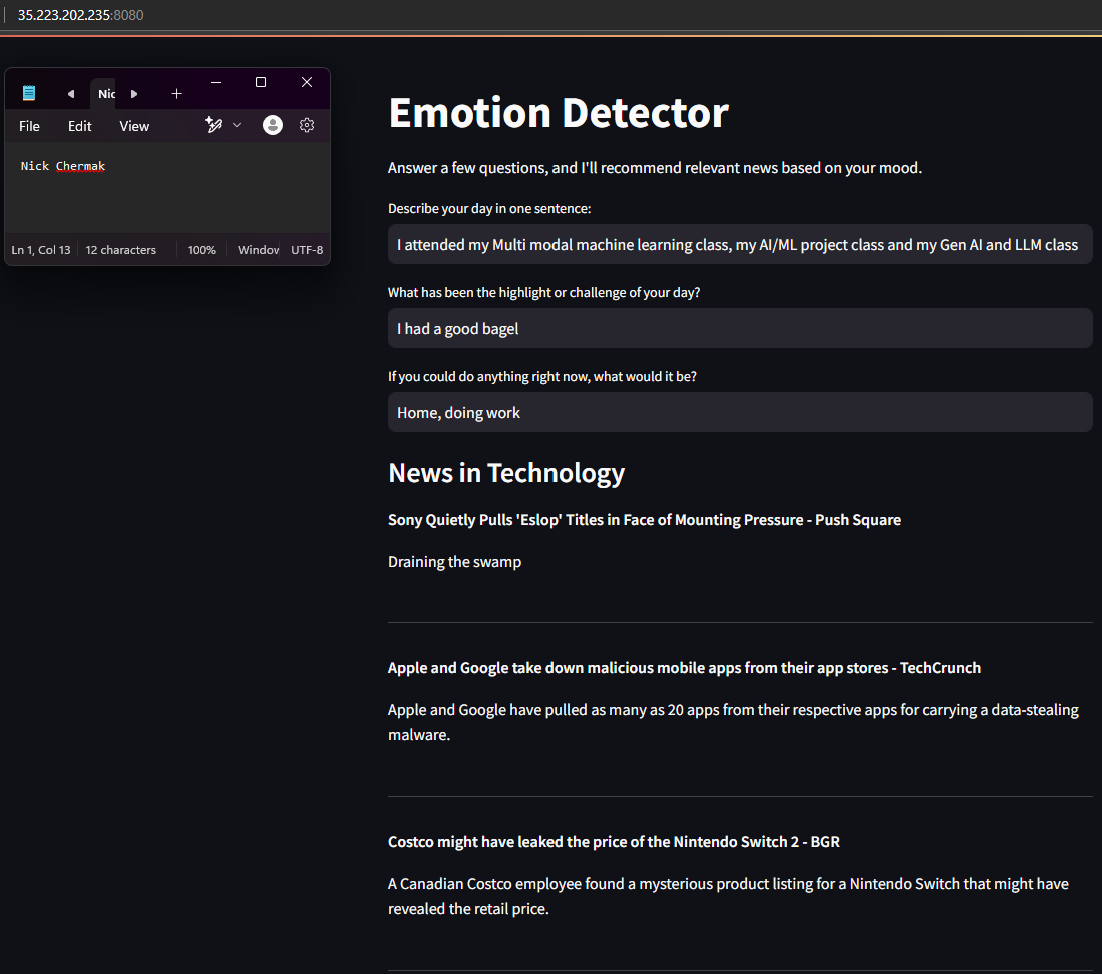

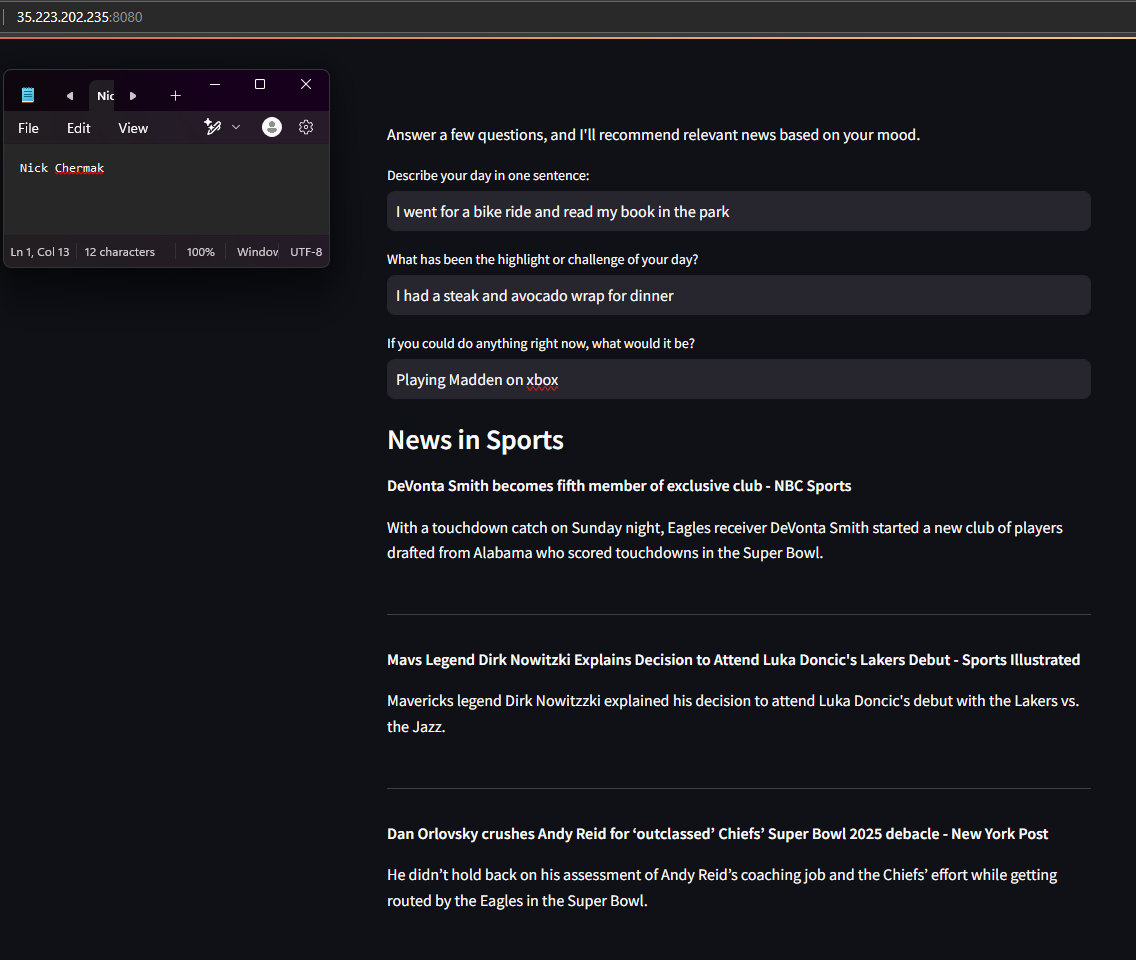

Without Tool Agent:

In [ ]:
import streamlit as st
import os
import vertexai
from langchain_google_vertexai import VertexAI
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain

import requests


# need to do this 
# pip install -r requirements.txt  - poetry
# then use: streamlit run main.py
# acutally use python -m streamlit run main.py (streamlit run main.py doesnt work)


os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="./nih-cl-cm500-nchermak-2ba6-c06ffadeffcb.json" # place the key JSON file in the same folder as your notebook

PROJECT_ID = "nih-cl-cm500-nchermak-2ba6" # use your project id, can get from key.json
REGION = "us-central1"  #


vertexai.init(project=PROJECT_ID, location=REGION)

llm = VertexAI(
    model_name="gemini-1.5-pro-001",
    max_output_tokens=256,
    temperature=0.1,
    top_p=0.8,
    top_k=40,
    verbose=True,
)

st.title("Emotion Detector")
st.write("Answer a few questions, and I'll recommend relevant news based on your mood.")

questions = [
    "Describe your day in one sentence: ",
    "What has been the highlight or challange of your day?",
    "If you could do anything right now, what would it be?"
]

user_querys = []

for question in questions:
    user_query = st.text_input(question, "")
    user_querys.append(user_query)


if all(user_querys):
    prompt_template_name = PromptTemplate(
        input_variables=['user_input'],
        # template="""
        # You are an AI assistant that classifies users' moods based on their responses.
        # Possible moods: Happy, Sad, Stressed, Excited, Neutral

        # The user inquiry: "{user_input}"

        # Classify their mood:
        # """
        template="""
        You are an AI assistant that classifies the user's mood based on their responses and then determines the most relevant news category.
        
        Possible moods: Happy, Sad, Stressed, Excited, Neutral.
        Possible news categories: Comedy, Sports, Technology, Business, Politics.
        
        User responses:
        {user_input}
        
        Step 1: Classify the user's mood.
        Step 2: Choose the most relevant news category for the user based on their mood.
        Step 3: Respond **only** with the name of the selected news category. Do not provide any additional text.
        """
    )
    chain = LLMChain(llm=llm, prompt=prompt_template_name)
    #category = chain.invoke({"user_input": user_query})
    # need to make lower case
    category = chain.invoke({"user_input": "\n".join(user_query)})['text'].strip().lower()


    def fetch_news(category):
        api_key = "7a2968502158483ba75e569b4b003ca3"
        url = f"https://newsapi.org/v2/top-headlines?category={category}&country=us&apiKey={api_key}"
        response = requests.get(url).json()
        articles = response.get("articles", [])[:3]
        return "\n".join([f"- {a.get('title', 'No title')}: {a.get('description', 'No description')}" for a in articles])

    news_summary = fetch_news(category)
    st.write(f"News Category: {category}")
    st.write(news_summary)

    #st.write(f"You should contact: {result['text']}")
    
# News API Key: 7a2968502158483ba75e569b4b003ca3

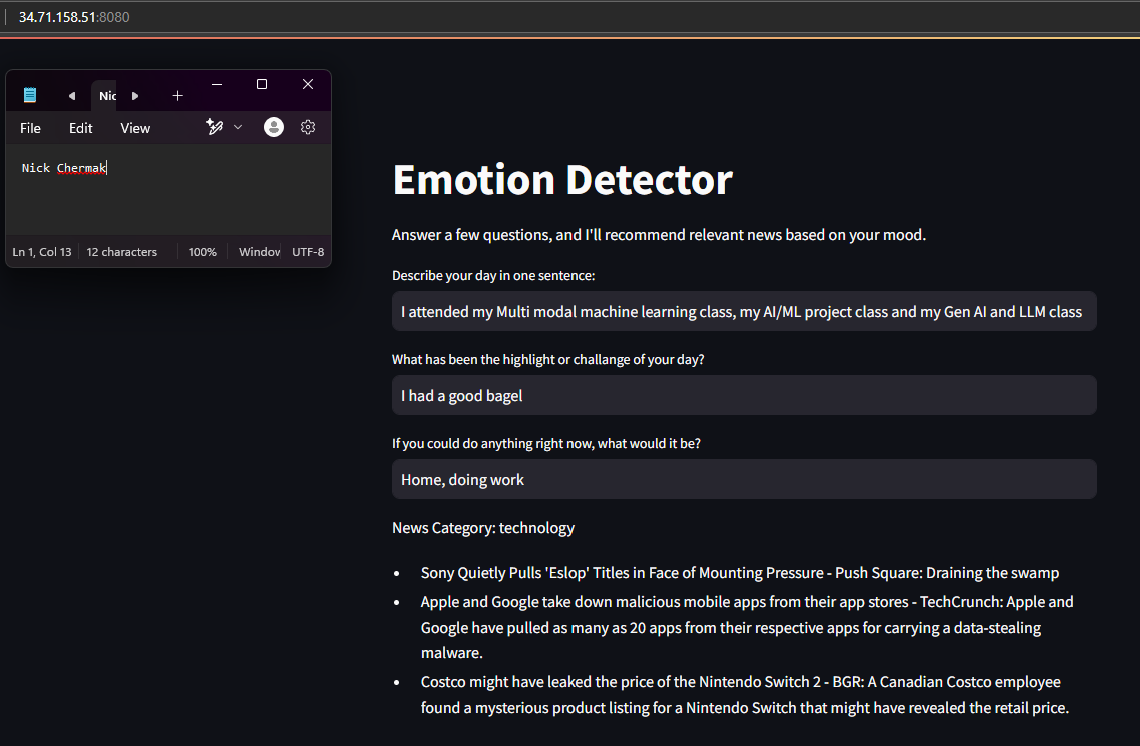

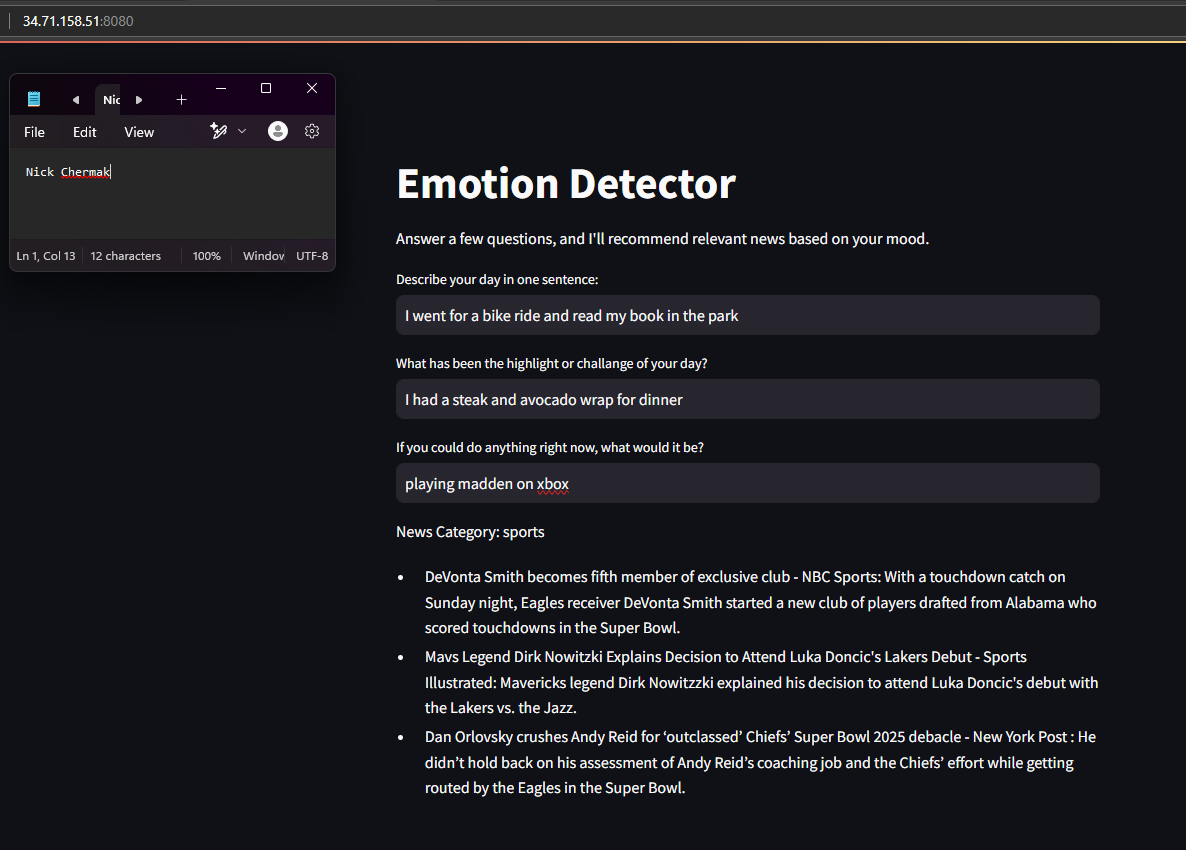

# **Q3**

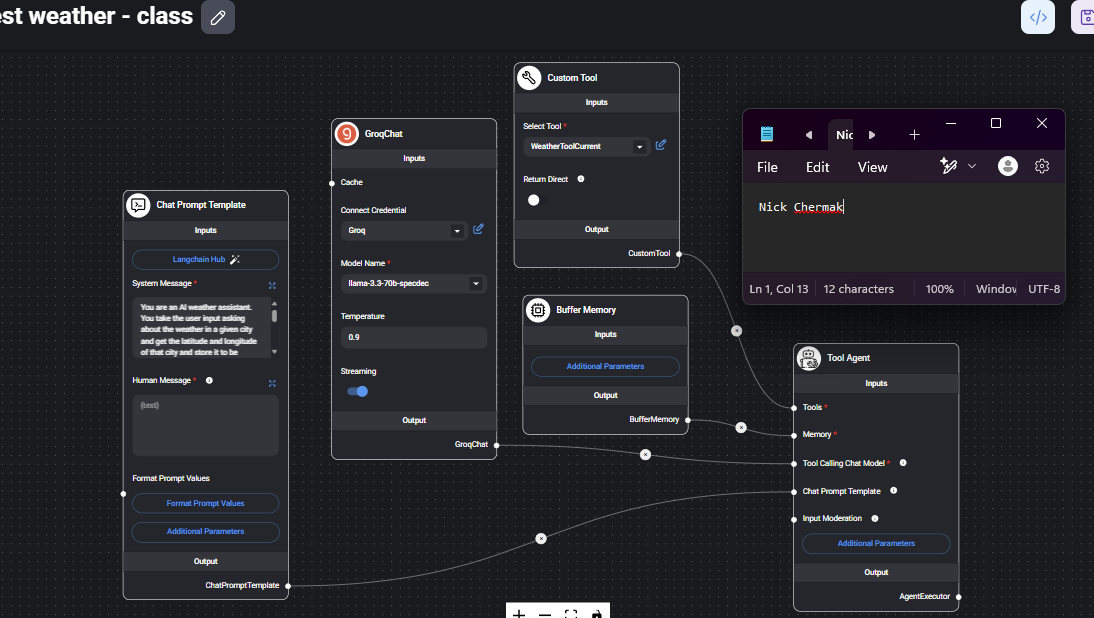

In [ ]:
import streamlit as st
import os
import vertexai
from langchain_google_vertexai import VertexAI
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain
import requests

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="./key.json"

PROJECT_ID = "nih-cl-cm500-ysakhale-e2a6"
REGION = "us-central1"

vertexai.init(project=PROJECT_ID, location=REGION)

llm = VertexAI(
    model_name="gemini-1.5-pro-001",
    max_output_tokens=256,
    temperature=0.1,
    top_p=0.8,
    top_k=40,
    verbose=True,
)

def get_weather_forecast(location="Pittsburgh", days=4):
    url = f"https://api.weatherbit.io/v2.0/forecast/daily?city={location}&key=594f1a8f78b74bc78328c20008adf0a9&days={days}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return {"error": "Could not fetch forecast data"}

st.title("Weather Assistant")
st.write("Ask about the current and upcoming weather")

query = st.text_input("Ask a weather-related question:")

if query:
    if "today" in query.lower():
        forecast_data = get_weather_forecast(days=1)
        if "error" not in forecast_data:
            today_weather = forecast_data["data"][0]
            temp = today_weather["temp"]
            condition = today_weather["weather"]["description"]
            st.write(f"The current temperature in Pittsburgh is {temp}°C with {condition}.")
        else:
            st.write("Error fetching current weather.")
    elif "next" in query.lower() or "forecast" in query.lower():
        forecast_data = get_weather_forecast()
        if "error" not in forecast_data:
            st.subheader("4-Day Weather Forecast:")
            for day in forecast_data["data"][:4]:
                date = day["valid_date"]
                temp = day["temp"]
                condition = day["weather"]["description"]
                st.write(f"On {date}, the temperature will be {temp}°C with {condition}.")
        else:
            st.write("Error fetching forecast.")
    else:
        prompt = PromptTemplate(
            input_variables=['query'],
            template="""
            You are a weather assistant. Answer questions related to weather conditions.
            
            User query: {query}
            """
        )
        
        weather_chain = LLMChain(llm=llm, prompt=prompt)
        weather_result = weather_chain.invoke({"query": query})
        st.write(weather_result["text"].strip())




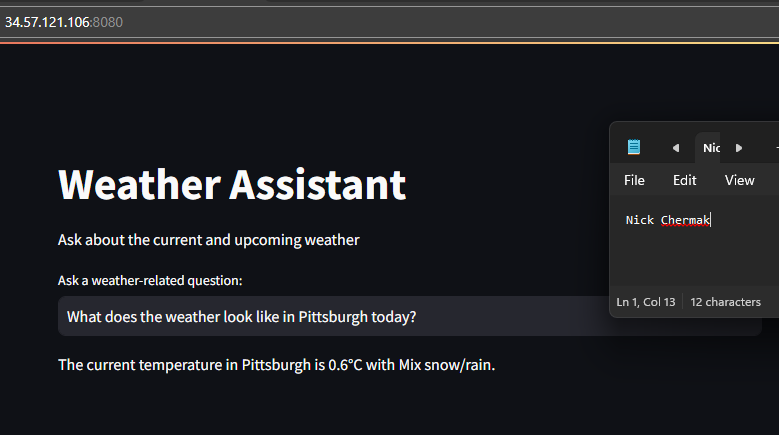

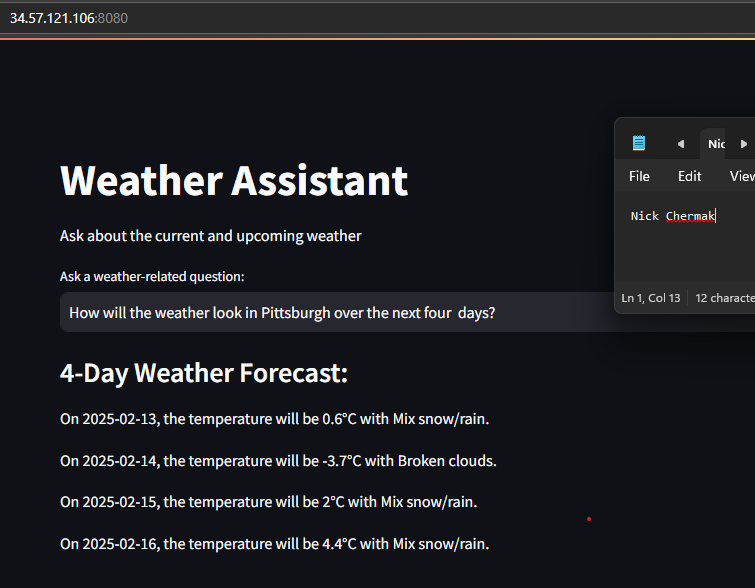